<a href="https://colab.research.google.com/github/pablonunez81/ucom_intro_prog_final_work/blob/main/M1_Trabajo_Final_pnunez_bbenitez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Trabajo Final - M1 Introducción a la programación para Ciencia de datos

#INTEGRANTES DEL GRUPO (Completar aquí)

1. 2.876.596, Pablo Núñez
2. NRO DOCUMENTO IDENTIDAD, APELLIDO Y NOMBRE

###  Contexto

Una empresa que vende Pizzas te ha contratado para que puedas ayudarlos a mejorar sus estrategias de negocios basándose en los datos. Para el efecto te han compartido los siguientes conjuntos de datos:
1.	**Orders**: contiene la fecha y la hora en que se realizaron todos los pedidos de la mesa.
2.	**Order_detail**: contiene las diferentes pizzas servidas con cada pedido en la tabla **Orders** y sus cantidades.
3.	**Pizzas**: contiene el tamaño y el precio de cada pizza distinta en la tabla **Order_detail**, así como su tipo de pizza más amplio.
4.	**Pizza_types**: contiene detalles sobre los tipos de pizza en la tabla **Pizzas**, incluido su nombre tal como aparece en el menú, la categoría a la que pertenece y su lista de ingredientes.

Tu misión como analista de datos será realizar el análisis exploratorio de datos "EDA“, por sus siglas en inglés, para analizar la información, buscar patrones en los datos y poder responder a las diferentes preguntas de negocio que interesan a la empresa.

Los pasos requeridos para el análisis se encuentran detallados en el archivo:  **M1 Trabajo Final.ipynb**

El trabajo consiste en desarrollar las celdas de código en **M1 Trabajo Final.ipynb** y presentar el archivo final resultante en el formato “.iypynb”


###  Importación de las librerías

Importa todas las librerias que consideres necesarias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
ruta = "/content/drive/MyDrive/ucom_trabajo_final/dataset/"

Mounted at /content/drive


###  Lectura de archivos

In [ ]:
from pandas._libs.tslibs.parsing import parse_datetime_string
from pandas.core.arrays.timedeltas import parse_timedelta_unit
from pandas.core.indexes.period import parse_time_string
df_orders = pd.read_csv(ruta+'orders.csv',parse_dates=['date', 'time'])
#df_order_details = pd.read_csv(ruta+'order_details.csv')
#df_pizza_types = pd.read_csv(ruta+'pizza_types.csv', header=0, encoding='unicode_escape')
#df_pizzas = pd.read_csv(ruta+'pizzas.csv')
#print(df_orders)
#print(df_order_details)
#print(df_pizza_types)
#print(df_pizzas)

####  Lee el archivo Orders

#### Verifica que el archivo haya sido cargado correctamente

In [ ]:
print(df_orders)

       order_id       date                time
0             1 2015-01-01 2022-10-30 11:38:36
1             2 2015-01-01 2022-10-30 11:57:40
2             3 2015-01-01 2022-10-30 12:12:28
3             4 2015-01-01 2022-10-30 12:16:31
4             5 2015-01-01 2022-10-30 12:21:30
...         ...        ...                 ...
21345     21346 2015-12-31 2022-10-30 20:51:07
21346     21347 2015-12-31 2022-10-30 21:14:37
21347     21348 2015-12-31 2022-10-30 21:23:10
21348     21349 2015-12-31 2022-10-30 22:09:54
21349     21350 2015-12-31 2022-10-30 23:02:05

[21350 rows x 3 columns]


####  ¿Cuántos registros tiene el conjunto de datos?

In [ ]:
n_orders = df_orders.count(0)
print(f'Cantidad de registros del conjunto de datos: {n_orders.order_id}')

Cantidad de registros del conjunto de datos: 21350


####  ¿Existen registros en blanco?

In [ ]:
if df_orders.isna().sum().sum() > 0:
  print('Existen registros en blanco')
else:
  print('No existen registros en blanco') 

No existen registros en blanco


####  ¿Cuáles son las columnas que tiene este dataset?

In [ ]:
print(f'las columnas que tiene el data set orders.csv son: ')
columns_of_orders = df_orders.columns.to_series()
for c in columns_of_orders:
  print (c)

las columnas que tiene el data set orders.csv son: 
order_id
date
time


#### ¿Las columnas de fechas y hora están cargadas correctamente?

In [ ]:
df_orders.info() 
df_orders    
print('las columnas \'date\' y \'time\' son del tipo datetime64. time tiene la fecha del sistema actual. se debe presentar solo la hora')             

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  21350 non-null  int64         
 1   date      21350 non-null  datetime64[ns]
 2   time      21350 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 500.5 KB
las columnas 'date' y 'time' son del tipo datetime64. time tiene la fecha del sistema actual. se debe presentar solo la hora


#### En caso que sea necesario corrige la columna fecha y hora

In [ ]:
df_orders['time'] = df_orders['time'].dt.strftime('%H:%M:%S')   # esto ejecutar una sola vez
df_orders

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30
...,...,...,...
21345,21346,2015-12-31,20:51:07
21346,21347,2015-12-31,21:14:37
21347,21348,2015-12-31,21:23:10
21348,21349,2015-12-31,22:09:54


----

#### Lee el archivo order_details

In [ ]:
df_order_details = pd.read_csv(ruta+'order_details.csv')

#### Verifica que el archivo haya sido cargado correctamente

In [ ]:
print(df_order_details)

       order_details_id  order_id       pizza_id  quantity
0                     1         1     hawaiian_m         1
1                     2         2  classic_dlx_m         1
2                     3         2  five_cheese_l         1
3                     4         2    ital_supr_l         1
4                     5         2     mexicana_m         1
...                 ...       ...            ...       ...
48615             48616     21348  ckn_alfredo_m         1
48616             48617     21348  four_cheese_l         1
48617             48618     21348   napolitana_s         1
48618             48619     21349     mexicana_l         1
48619             48620     21350      bbq_ckn_s         1

[48620 rows x 4 columns]


#### ¿Cuántos registros tiene el conjunto de datos?

In [ ]:
n_order_details = df_order_details.count(0)
print(f'Cantidad de registros del conjunto de datos: {n_order_details.order_details_id}')

Cantidad de registros del conjunto de datos: 48620


####  ¿Existen registros en blanco?

In [ ]:

if df_order_details.isna().sum().sum() > 0:
  print('Existen registros en blanco')
else:
  print('No existen registros en blanco') 

No existen registros en blanco


####  ¿Cuáles son las columnas que tiene este dataset?

In [ ]:
print(f'las columnas que tiene el data set order_details.csv son: ')
columns_of_orders = df_order_details.columns.to_series()
for c in columns_of_orders:
  print (c)

las columnas que tiene el data set order_details.csv son: 
order_details_id
order_id
pizza_id
quantity


#### ¿Las columnas están cargadas con el tipo de dato correcto?

In [ ]:
df_order_details.info() 
df_order_details 
print('la columna \'pizza_id\' es del tipo OBJECT. debería ser del tipo \'string\'')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
la columna 'pizza_id' es del tipo OBJECT. debería ser del tipo 'string'


#### Corrige las columnas que creas se están cargando de manera incorrecta

In [ ]:
df_order_details['pizza_id'] = df_order_details['pizza_id'].astype('string')
df_order_details.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  string
 3   quantity          48620 non-null  int64 
dtypes: int64(3), string(1)
memory usage: 1.5 MB


-----

#### Lee el archivo pizzas

In [ ]:
df_pizzas = pd.read_csv(ruta+'pizzas.csv')
#df_pizzas = pd.read_csv(ruta+'pizzas_con_nulos.csv')

#### Verifica que el archivo haya sido cargado correctamente

In [ ]:
print(df_pizzas)

         pizza_id pizza_type_id size  price
0       bbq_ckn_s       bbq_ckn    S  12.75
1       bbq_ckn_m       bbq_ckn    M  16.75
2       bbq_ckn_l       bbq_ckn    L  20.75
3      cali_ckn_s      cali_ckn    S  12.75
4      cali_ckn_m      cali_ckn    M  16.75
..            ...           ...  ...    ...
91  spinach_fet_m   spinach_fet    M  16.00
92  spinach_fet_l   spinach_fet    L  20.25
93   veggie_veg_s    veggie_veg    S  12.00
94   veggie_veg_m    veggie_veg    M  16.00
95   veggie_veg_l    veggie_veg    L  20.25

[96 rows x 4 columns]


#### ¿Cuántos registros tiene el conjunto de datos?

In [ ]:
n_df_pizzas = df_pizzas.count(0)
print(f'Cantidad de registros del conjunto de datos: {n_df_pizzas.pizza_id}')

Cantidad de registros del conjunto de datos: 96


####  ¿Existen registros en blanco?

In [ ]:
if df_pizzas.isna().sum().sum() > 0:
  print(f'tiene registros en blanco')
else:
  print('no tiene registros en blancos')

no tiene registros en blancos


####  ¿Cuáles son las columnas que tiene este dataset?

In [ ]:
print(f'las columnas que tiene el data set pizzas.csv son: ')
columns_of_orders = df_pizzas.columns.to_series()
for c in columns_of_orders:
  print (c)

las columnas que tiene el data set pizzas.csv son: 
pizza_id
pizza_type_id
size
price


#### ¿Las columnas están cargadas con el tipo de dato correcto?

In [ ]:
df_pizzas.info()
print('las columnas \'pizza_id, pizza_type_id, size\' son del tipo OBJECT. podrían ser del tipo \'string\'')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB
las columnas 'pizza_id, pizza_type_id, size' son del tipo OBJECT. podrían ser del tipo 'string'


------

#### Lee el archivo pizza_types

In [ ]:
df_pizza_types = pd.read_csv(ruta+'pizza_types.csv', header=0, encoding='unicode_escape')

#### Verifica que el archivo haya sido cargado correctamente

In [ ]:
print(df_pizza_types)

   pizza_type_id                                        name category  \
0        bbq_ckn                  The Barbecue Chicken Pizza  Chicken   
1       cali_ckn                The California Chicken Pizza  Chicken   
2    ckn_alfredo                   The Chicken Alfredo Pizza  Chicken   
3      ckn_pesto                     The Chicken Pesto Pizza  Chicken   
4     southw_ckn                 The Southwest Chicken Pizza  Chicken   
5       thai_ckn                      The Thai Chicken Pizza  Chicken   
6       big_meat                          The Big Meat Pizza  Classic   
7    classic_dlx                    The Classic Deluxe Pizza  Classic   
8       hawaiian                          The Hawaiian Pizza  Classic   
9    ital_cpcllo                 The Italian Capocollo Pizza  Classic   
10    napolitana                        The Napolitana Pizza  Classic   
11   pep_msh_pep  The Pepperoni, Mushroom, and Peppers Pizza  Classic   
12     pepperoni                         The Pepper

#### ¿Cuántos registros tiene el conjunto de datos?

In [ ]:
n_df_pizza_types = df_pizza_types.count(0)
print(f'Cantidad de registros del conjunto de datos: {n_df_pizza_types.pizza_type_id}')

Cantidad de registros del conjunto de datos: 32


####  ¿Existen registros en blanco?

In [ ]:
if df_pizza_types.isna().sum().sum() > 0:
  print(f'tiene registros en blanco')
else:
  print('no tiene registros en blancos')

no tiene registros en blancos


####  ¿Cuáles son las columnas que tiene este dataset?

In [ ]:
print(f'las columnas que tiene el data set pizza_types.csv son: ')
columns_of_orders = df_pizza_types.columns.to_series()
for c in columns_of_orders:
  print (c)

las columnas que tiene el data set pizza_types.csv son: 
pizza_type_id
name
category
ingredients


#### ¿Las columnas están cargadas con el tipo de dato correcto?

In [ ]:
print('las columnas \'pizza_type_id, name, category, ingredients\' son del tipo OBJECT. Podrían ser del tipo \'string\'')

las columnas 'pizza_type_id, name, category, ingredients' son del tipo OBJECT. Podrían ser del tipo 'string'


### Inicio de EDA

#### ¿A qué periodo corresponden las ventas?

In [ ]:
orders = df_orders.sort_values(by=['date'], ascending=True)
start_date = orders.head(1) #orders.iloc[[0],[1]]
end_date = orders.tail(1)
print(f'Las ventas corresponde al periodo entre {start_date.iloc[0,1]} y {end_date.iloc[0,1]}')

Las ventas corresponde al periodo entre 2015-01-01 00:00:00 y 2015-12-31 00:00:00


#### ¿Cuántos fueron los pedidos por mes?

In [ ]:
# https://www.analyticslane.com/2018/07/06/agrupacion-de-datos-por-fecha-en-pandas/
# agrupar por mes
# contar por mes
df_orders.index = df_orders['date']
monthly_orders = df_orders.resample('M').count()
monthly_orders_list = monthly_orders.iloc[:,0:1] 
monthly_orders_list
#monthly_orders['date']
#df_orders['date'].dt.quarter
#df_orders.info()
#df_orders
#print(f'Los pedidos por mes fueron: {number_of_orders}')

,order_id
date,
2015-01-31,1845
2015-02-28,1685
2015-03-31,1840
2015-04-30,1799
2015-05-31,1853
2015-06-30,1773
2015-07-31,1935
2015-08-31,1841
2015-09-30,1661


#### Haz un gráfico que permita visualizar la cantidad de pedidos por mes

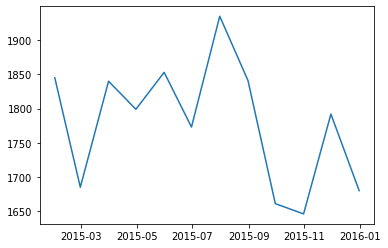

In [ ]:
#plt.plot(monthly_orders_list)
plt.plot(monthly_orders.index, monthly_orders.order_id)
plt.show()

#### ¿Cuál fue el promedio de pedidos mensual?

In [ ]:
print(f'El promedio de pedidos mensual es: {monthly_orders_list.mean()}')

El promedio de pedidos mensual es: order_id    1779.166667
dtype: float64


Para poder responder varias de las siguientes preguntas deberás realizar la transformación de los datos, que irá desde la unión de varios DataFrames hasta el calculo de nuevas columnas

In [ ]:
merge_orders_x_details = pd.merge(df_orders, df_order_details, on='order_id')
merge_orders_x_pizzas = pd.merge(merge_orders_x_details, df_pizzas, on='pizza_id')

#### ¿Cuántas pizzas se vendieron por mes y cuánto se facturó?

In [ ]:
merge_orders_x_pizzas.index = merge_orders_x_pizzas['date']
merge_orders_x_pizzas['date'] = pd.to_datetime(merge_orders_x_pizzas['date'])   # formateamos el objeto al tipo date
merge_orders_x_pizzas['month'] = merge_orders_x_pizzas['date'].dt.month         # añadimos una columna con el número de mes
pizza_x_month = merge_orders_x_pizzas.resample('M').count()                     # agrupamos cantidad de pizzas por mes

print('Pizzas vendidas por mes:')
pizza_x_month.iloc[:,:1]

Pizzas vendidas por mes:


,order_id
date,
2015-01-31,4156
2015-02-28,3892
2015-03-31,4186
2015-04-30,4067
2015-05-31,4239
2015-06-30,4025
2015-07-31,4301
2015-08-31,4094
2015-09-30,3819


In [ ]:
#----cuanto se facturo por mes----
merge_orders_x_pizzas['total_por_mes'] = merge_orders_x_pizzas['price'] * merge_orders_x_pizzas['quantity']
total_por_mes = merge_orders_x_pizzas.resample('M').sum()
print('Cuánto se facturó por mes:')
total_por_mes[['total_por_mes']]

Cuánto se facturó por mes:


,total_por_mes
date,
2015-01-31,69793.30
2015-02-28,65159.60
2015-03-31,70397.10
2015-04-30,68736.80
2015-05-31,71402.75
2015-06-30,68230.20
2015-07-31,72557.90
2015-08-31,68278.25
2015-09-30,64180.05


#### Haz gráficos que permitan visualizar la cantidad de pizzas vendidas y la facturación por mes

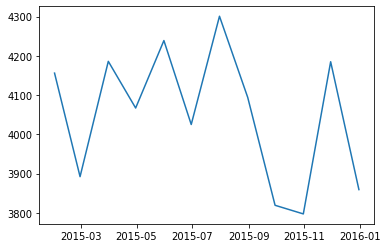

In [ ]:
#pizza_x_month['date'] = pd.to_datetime(pizza_x_month['date'])
#merge_orders_x_pizzas.resample('M').count()
#pizza_x_month.plot.bar()
#df_order_details[df_order_details.order_id==2]                  # trae los datos con order_id 2
#plt.plot(pizza_x_month.index, pizza_x_month.order_id)
#plt.show()


#### ¿En qué mes se tuvo la menor venta y cuál fue el importe facturado?

#### ¿En qué mes  se tuvo la mayor venta y cuál fue el importe facturado?

#### ¿Cuál es el promedio general de ventas por días de la semana?

#### Haz un gráfico de tipo heatmap u otro que ayude a visualizar mejor la información

#### Analiza el comportamiento de ventas mensual (Suma,Promedio, Mediana,mínimo,máximo,desviación estandart) según la cantidad de pizzas vendidas

#### ¿Cuántas pizzas se vendieron en total?

####  ¿Cúal es el nombre de la pizza que más se vende?

####  ¿Cúal es el nombre de la pizza que menos se vende?

#### ¿Cuál es el top 10 de sabores de pizzas más vendidas?

#### ¿Cómo son las ventas totales por tamaño de pizzas?

####  ¿Cuántas pizzas según el nombre y tamaño se vendieron?

#### Haz un gráfico que permita visualizar la ventas por tamaño de pizzas